In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import json

method 1

In [5]:
method1 = '/Users/shambhavikrishna/Desktop/umass 2/nlp/Fine-Tuning Intelligence/stats/PPO-modified_method1-STATS.json'

In [45]:
with open(method1, "r") as f:
    # Read the contents of the file
    json_data = f.read()

In [46]:
data_dict_1 = json.loads(json_data)

In [47]:
data_dict_1['stats'][0].keys()

dict_keys(['objective/kl', 'objective/kl_dist', 'objective/logprobs', 'objective/ref_logprobs', 'objective/kl_coef', 'objective/entropy', 'ppo/mean_non_score_reward', 'ppo/mean_scores', 'ppo/std_scores', 'tokens/queries_len_mean', 'tokens/queries_len_std', 'tokens/queries_dist', 'tokens/responses_len_mean', 'tokens/responses_len_std', 'tokens/responses_dist', 'ppo/loss/policy', 'ppo/loss/value', 'ppo/loss/total', 'ppo/policy/entropy', 'ppo/policy/approxkl', 'ppo/policy/policykl', 'ppo/policy/clipfrac', 'ppo/policy/advantages', 'ppo/policy/advantages_mean', 'ppo/policy/ratio', 'ppo/returns/mean', 'ppo/returns/var', 'ppo/val/vpred', 'ppo/val/error', 'ppo/val/clipfrac', 'ppo/val/mean', 'ppo/val/var', 'ppo/val/var_explained', 'ppo/learning_rate', 'time/ppo/forward_pass', 'time/ppo/compute_rewards', 'time/ppo/compute_advantages', 'time/ppo/optimize_step', 'time/ppo/calc_stats', 'time/ppo/total'])

In [48]:
env_reward_mean_method1 = []

for s in data_dict_1['stats']:
    env_reward_mean_method1.append(s['ppo/mean_non_score_reward'])

In [49]:
method_1_stats = data_dict_1['stats']

method2

In [19]:
m2_11 = '/Users/shambhavikrishna/Desktop/umass 2/nlp/Fine-Tuning Intelligence/stats/PPO_Method2_Iteration1-1-STATS.json'
m2_12 = '/Users/shambhavikrishna/Desktop/umass 2/nlp/Fine-Tuning Intelligence/stats/PPO_Method2_Iteration1-2-STATS.json'
m2_21 = '/Users/shambhavikrishna/Desktop/umass 2/nlp/Fine-Tuning Intelligence/stats/PPO_Method2_Iteration2-1-STATS.json'
m2_22 = '/Users/shambhavikrishna/Desktop/umass 2/nlp/Fine-Tuning Intelligence/stats/PPO_Method2_Iteration2-2-STATS.json'

In [33]:
method_2_stats = []

In [34]:
with open(m2_11, "r") as f:
    # Read the contents of the file
    json_data = f.read()
data_dict_m211 = json.loads(json_data)
method_2_stats += data_dict_m211['stats']

In [35]:
method_2_stats[0].keys() == data_dict_m211['stats'][0].keys()

True

In [36]:
len(method_2_stats)

125

In [37]:
with open(m2_12, "r") as f:
    # Read the contents of the file
    json_data = f.read()
data_dict_m212 = json.loads(json_data)
method_2_stats += data_dict_m212['stats']

In [38]:
len(method_2_stats)

250

In [39]:
with open(m2_21, "r") as f:
    # Read the contents of the file
    json_data = f.read()
data_dict_m221 = json.loads(json_data)
method_2_stats += data_dict_m221['stats']

In [40]:
len(method_2_stats)

375

In [41]:
with open(m2_22, "r") as f:
    # Read the contents of the file
    json_data = f.read()
data_dict_m222 = json.loads(json_data)
method_2_stats += data_dict_m222['stats']

In [52]:
len(method_2_stats)

500

In [51]:
len(method_2_stats) == len(method_1_stats)

True

Plotting

Objective KL

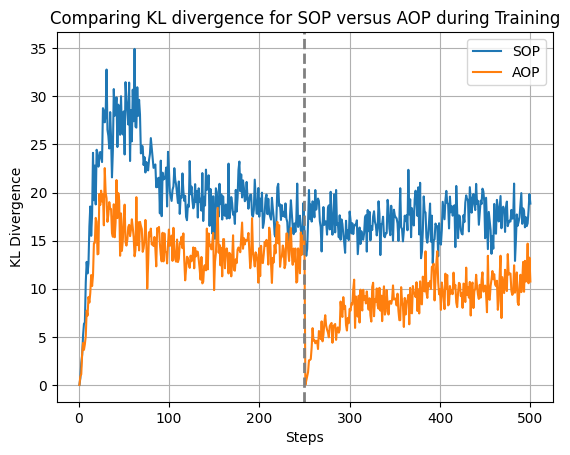

In [105]:
temp1, temp2 = [], []
for i in range(500):
    temp1 += [method_1_stats[i]['objective/kl']]
    temp2 += [method_2_stats[i]['objective/kl']]

plt.plot(range(1, 501), temp1, label = 'SOP')
plt.plot(range(1, 501), temp2, label = 'AOP')
plt.axvline(x=250, color='gray', linestyle='--', linewidth=2)

plt.xlabel('Steps')
plt.ylabel('KL Divergence')
plt.legend()
plt.title('Comparing KL divergence for SOP versus AOP during Training')
plt.grid(True)

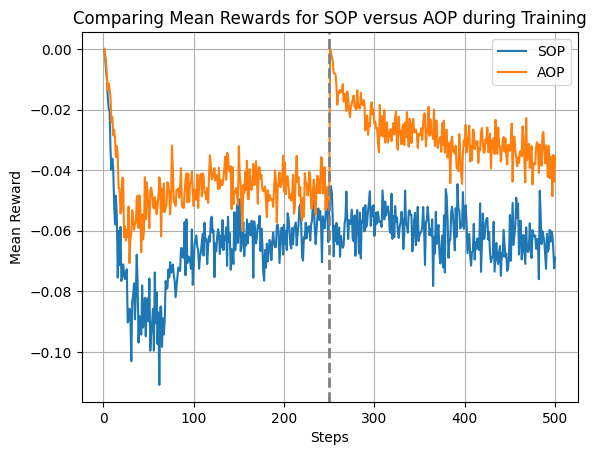

In [106]:
temp1, temp2 = [], []
for i in range(500):
    temp1 += [method_1_stats[i]['ppo/mean_non_score_reward']]
    temp2 += [method_2_stats[i]['ppo/mean_non_score_reward']]

plt.plot(range(1, 501), temp1, label = 'SOP')
plt.plot(range(1, 501), temp2, label = 'AOP')
plt.axvline(x=250, color='gray', linestyle='--', linewidth=2)

plt.xlabel('Steps')
plt.ylabel('Mean Reward')
plt.legend()
plt.title('Comparing Mean Rewards for SOP versus AOP during Training')
plt.grid(True)

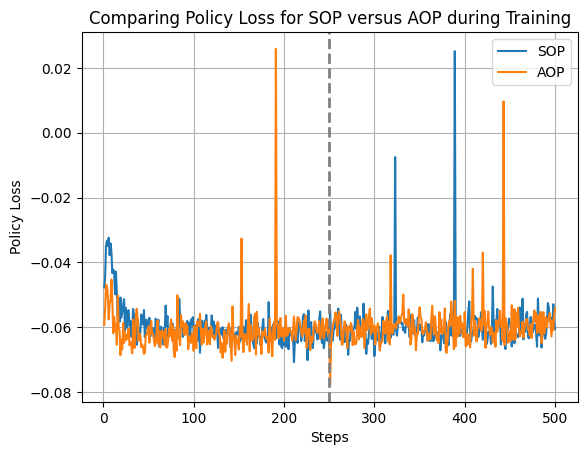

In [107]:
temp1, temp2 = [], []
for i in range(500):
    temp1 += [method_1_stats[i]['ppo/loss/policy']]
    temp2 += [method_2_stats[i]['ppo/loss/policy']]

plt.plot(range(1, 501), temp1, label = 'SOP')
plt.plot(range(1, 501), temp2, label = 'AOP')
plt.axvline(x=250, color='gray', linestyle='--', linewidth=2)

plt.xlabel('Steps')
plt.ylabel('Policy Loss')
plt.legend()
plt.title('Comparing Policy Loss for SOP versus AOP during Training')
plt.grid(True)

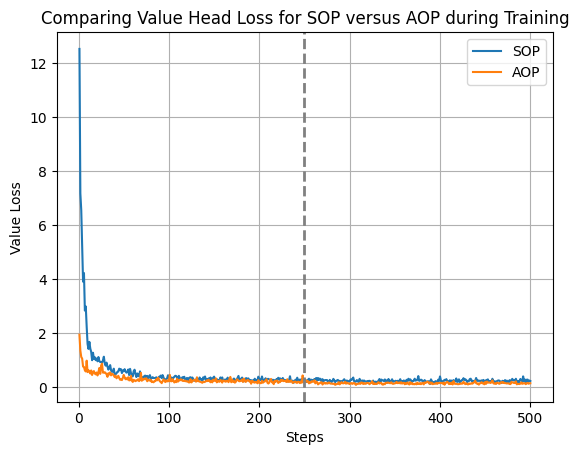

In [108]:
temp1, temp2 = [], []
for i in range(500):
    temp1 += [method_1_stats[i]['ppo/loss/value']]
    temp2 += [method_2_stats[i]['ppo/loss/value']]

plt.plot(range(1, 501), temp1, label = 'SOP')
plt.plot(range(1, 501), temp2, label = 'AOP')
plt.axvline(x=250, color='gray', linestyle='--', linewidth=2)

plt.xlabel('Steps')
plt.ylabel('Value Loss')
plt.legend()
plt.title('Comparing Value Head Loss for SOP versus AOP during Training')
plt.grid(True)

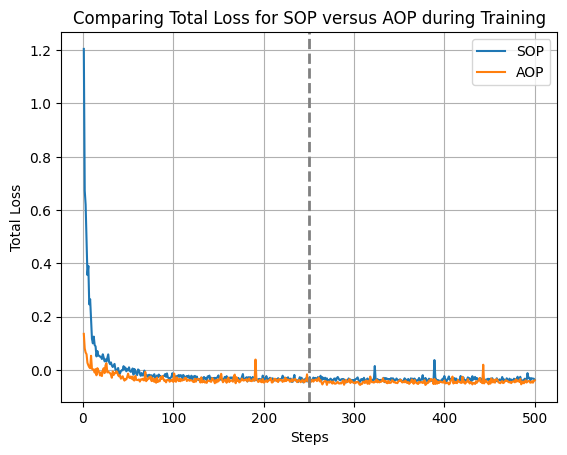

In [109]:
temp1, temp2 = [], []
for i in range(500):
    temp1 += [method_1_stats[i]['ppo/loss/total']]
    temp2 += [method_2_stats[i]['ppo/loss/total']]

plt.plot(range(1, 501), temp1, label = 'SOP')
plt.plot(range(1, 501), temp2, label = 'AOP')
plt.axvline(x=250, color='gray', linestyle='--', linewidth=2)

plt.xlabel('Steps')
plt.ylabel('Total Loss')
plt.legend()
plt.title('Comparing Total Loss for SOP versus AOP during Training')
plt.grid(True)

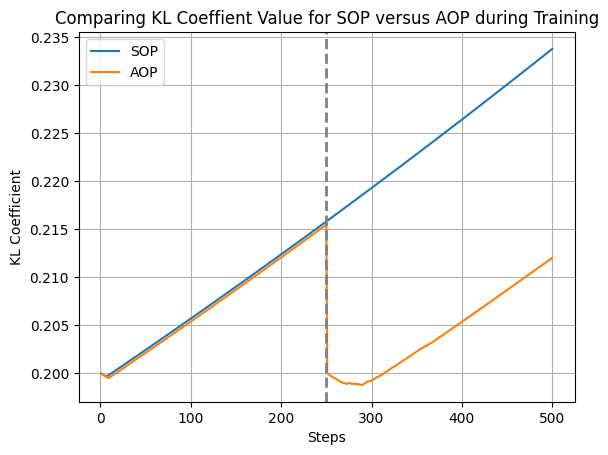

In [110]:
temp1, temp2 = [], []
for i in range(500):
    temp1 += [method_1_stats[i]['objective/kl_coef']]
    temp2 += [method_2_stats[i]['objective/kl_coef']]

plt.plot(range(1, 501), temp1, label = 'SOP')
plt.plot(range(1, 501), temp2, label = 'AOP')
plt.axvline(x=250, color='gray', linestyle='--', linewidth=2)

plt.xlabel('Steps')
plt.ylabel('KL Coefficient')
plt.legend()
plt.title('Comparing KL Coeffient Value for SOP versus AOP during Training')
plt.grid(True)

Figure \ref{figs/kl_plot} shows the changes in the KL divergence across each step for SOP and AOP (i.e. for each batch of 16 data points).
Ideally, during training, the KL divergence should be a positive number, and not too high, since the current or learning policy should not stray too much from the reference policy. Also, the KL divergence always starts at 0, since initially the two policies are equal. It should also be noted that at the 250th step, the KL divergence for AOP goes to zero, since this is the start of the second training iteration, where the new on-policy data is updated. 

We can see that in the case of SOP, the numbers are a bit higher than AOP, and it also seems to converge to a higher number than AOP does in the same number of steps. This proves that not only is the AOP data on policy, but it makes the learning more stable and keeps the KL divergence low throughout, while still exploring the trust region. In this way, we can see that when the model is specifically shown data where it is performing badly, it is able to constrain its \textit{exploration} accordingly, and not have unnecessarily high KL divergence by trying to explore by virtue of its irrelevant `teaching' data.

Figure \ref{figs/reward_plot} shows the mean reward for each step of SOP and AOP. Here the reward is much higher for AOP than SOP. Again, we see that one the data is changed (in the 250th step), the rewards are higher, and it begins learning.

Note that the prompts AOP receives would cause it to see the kind of questions that it gets wrong a lot. So, while training proceeds, and these facets improve, the reward will remain fairly steady. In each iteration of AOP, each training point is seen twice, and the same is done for SOP, where it sees each of its initially curated 4000 AOP records twice, once in each iteration. Hence this is a fair comparison that proves that using on-policy preferences during RLHF shows better, more efficient training that learns more effectively. Section \ref{sec:eval} shows an in-depth comparison of these models across different metrics.